In [77]:
from bs4 import BeautifulSoup as bs
from bs4.element import Comment
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

#Data Question 4: Web Scraping Earthquake Data
##Part 1:

Nate Silver discusses the difficulty of predicting earthquakes in The Signal and the Noise. Nevertheless, we will try to identify some patterns by analyzing the deadly earthquakes that have occurred since 1900.

To start, read the table of earthquakes from https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900 using the requests and/or beautifulsoup library and load it to a pandas dataframe. You will need to do some data cleaning before you can proceed.

In [2]:
url='https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900'

In [3]:
earthq_resp=requests.get(url).content

In [4]:
#print(earthq_resp.status_code)

In [5]:
# parse data from the html into a beautifulsoup object
earthq_soup=bs(earthq_resp, 'html.parser')
earthq_table=earthq_soup.find('table',{'class':"wikitable"})

In [6]:
earthq_table 

<table class="sortable wikitable">
<tbody><tr bgcolor="#CCCCCC">
<th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
<th width="33%">Present-day country and link to Wikipedia article</th>
<th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
<th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
<th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
<th width="6%">Magnitude</th>
<th width="9%">Secondary Effects</th>
<th width="10%">PDE Shaking Deaths</th>
<th width="10%">PDE Total Deaths</th>
<th width="10%">Utsu Total Deaths</th>
<th width="10%">EM-DAT Total Deaths</th>
<th width="12%">Other Source Deaths
</th></tr>
<tr>
<td>1900-05-11 17:23</td>
<td>Japan</td>
<td>38.700</td>
<td>141.100</td>
<td>5</td>
<td>7.0 <a href="/wiki/Seismic_magnitude_scales#Mjma" title="Seismic magnitude scales"><span class="rt-commentedText" title="JMA mag.">M<sub>JMA</sub></span></a></td>
<td></td>
<td>

In [7]:
#convert html to list of data frame object
earthq_df=pd.read_html(str(earthq_table))
# convert list to dataframe
earthq_df=pd.DataFrame(earthq_df[0])

In [8]:
earthq_df.head(60)

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1.0,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1.0,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86.0,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4.0,NaN,NaN


##Data cleaning tasks include:

- Replace empty strings with NaN
- Remove the footnotes from the 'Other Source Deaths' column
- Convert Magnitude to a numeric type. For this portion, you can ignore differences in seismic magnitude scales.
- Correct number of deaths when there is more than one value. When there is more than one value given, choose the largest.
- Create a new column ('deaths') that evaluates the four total-death columns ('PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', and 'Other Source Deaths') and populates the new column with the highest value.
- Explore the data in terms of when and where earthquakes occurred and how severe they were (magnitude, deaths, secondary effects).

In [9]:
earthq_df=earthq_df.replace(r'^\s*$', np.NaN, regex=True)

In [10]:
earthq_df. head(60)  

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1.0,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1.0,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86.0,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4.0,NaN,NaN


In [11]:
earthq_df. tail(60)

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1280,2007-01-21 11:27,Indonesia,1.065,126.282,22,7.5 Mw,NaN,3.0,4.0,NaN,NaN,NaN
1281,2007-03-06 03:49,Indonesia (see March 2007 Sumatra earthquakes),-0.480,100.470,19.3,6.4 Mw,NaN,67.0,67.0,NaN,67,NaN
1282,2007-03-25 00:41,Japan (see 2007 Noto earthquake),37.340,136.540,8,6.7 Mw,T,1.0,1.0,NaN,1,NaN
1283,2007-04-01 20:39,Solomon Islands (see 2007 Solomon Islands eart...,-8.430,157.060,10,8.1 Mw,"T,L",0.0,54.0,NaN,NaN,NaN
1284,2007-04-21 17:53,Chile (see 2007 Aysén Fjord earthquake),-45.240,-72.670,36.7,6.2 Mw,"T,L",0.0,10.0,NaN,10,NaN
1285,2007-06-02 21:34,China,23.020,101.010,5,6.1 Mw,L,3.0,3.0,NaN,3,NaN
1286,2007-07-16 01:13,Japan (see 2007 Chūetsu offshore earthquake),37.520,138.460,12,6.6 Mw,"T,L",9.0,9.0,NaN,9,NaN
1287,2007-07-21 22:44,Tajikistan,38.936,70.485,10,5.2 Mw,L,3.0,12.0,NaN,11,NaN
1288,2007-08-02 02:37,Russian Federation,47.110,141.810,5,6.2 Mw,T,2.0,2.0,NaN,2,NaN
1289,2007-08-15 23:40,Peru (see 2007 Peru earthquake),-13.380,-76.610,39,8.0 Mw,L,514.0,514.0,NaN,519,NaN


In [12]:
earthq_df['OtherSourceDeathsClean1']=earthq_df['Other Source Deaths'].str.extract('\s*(\d+\,*\d*)\D*').replace(',','')

In [13]:
earthq_df['OtherSourceDeathsClean1']=earthq_df['OtherSourceDeathsClean1'].str.replace(',','').astype('float')

In [14]:
earthq_df['Other Source Deaths'].unique()

array([nan, '3500', '8000+', '46', '164[6]', '1500[6]', '105000', '1404',
       '1', '120', '200', '380', '2041', '33[8]', '45000[9]', '2489[10]',
       '26271[11] 26000[12]', '68', '231000*[13] 283000*[14] 227898*[15]',
       '41', '60[16]', '215', '34', '295', '79', '189', '1115',
       '222,517[17]', '521[19]', '42', '2698', '185', '15894[20]', '150+',
       '111+', '601 (as of October 30, 2011)'], dtype=object)

In [15]:
earthq_df['OtherSourceDeathsClean2']=earthq_df['Other Source Deaths'].str.extract(r'\*+\[+\d+\]+\s+(\d+)\*+\[+\d+\]+\s+').astype('float')

In [16]:
earthq_df['OtherSourceDeathsClean3']=earthq_df['Other Source Deaths'].str.extract(r'\*+\[+\d+\]+\s+\d+\*+\[+\d+\]+\s+(\d+)\*+\[\d+\]+').astype('float')

In [17]:
earthq_df['OtherSourceDeathsClean2'].unique()

array([    nan, 283000.])

In [18]:
earthq_df['OtherSourceDeathsClean3'].unique()

array([    nan, 227898.])

In [19]:
earthq_df['OtherSourceDeathsClean'] = earthq_df[[
    'OtherSourceDeathsClean1','OtherSourceDeathsClean2','OtherSourceDeathsClean3']].max(axis=1).astype('float')

In [20]:
earthq_df['OtherSourceDeathsClean'].unique()

array([        nan, 3.50000e+03, 8.00000e+03, 4.60000e+01, 1.64000e+02,
       1.50000e+03, 1.05000e+05, 1.40400e+03, 1.00000e+00, 1.20000e+02,
       2.00000e+02, 3.80000e+02, 2.04100e+03, 3.30000e+01, 4.50000e+04,
       2.48900e+03, 2.62710e+04, 6.80000e+01, 2.83000e+05, 4.10000e+01,
       6.00000e+01, 2.15000e+02, 3.40000e+01, 2.95000e+02, 7.90000e+01,
       1.89000e+02, 1.11500e+03, 2.22517e+05, 5.21000e+02, 4.20000e+01,
       2.69800e+03, 1.85000e+02, 1.58940e+04, 1.50000e+02, 1.11000e+02,
       6.01000e+02])

In [21]:
earthq_df['Magnitude_num']=earthq_df['Magnitude'].str.extract(r'(\d+\.\d+)\w*\D*\d*\D*').astype('float')

In [22]:
earthq_df['Magnitude_type']=earthq_df['Magnitude'].str.extract(r'\d+\.\d+\s*(\w+)')

In [23]:
earthq_df.head(60)

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,OtherSourceDeathsClean1,OtherSourceDeathsClean2,OtherSourceDeathsClean3,OtherSourceDeathsClean,Magnitude_num,Magnitude_type
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,MJMA
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,5.9,Muk
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,Mw
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,Ms
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.4,Muk
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Mw
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.8,Ms
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.9,Ms
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,6.9,Muk
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.5,Muk


In [24]:
earthq_df.tail(60)

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,OtherSourceDeathsClean1,OtherSourceDeathsClean2,OtherSourceDeathsClean3,OtherSourceDeathsClean,Magnitude_num,Magnitude_type
1280,2007-01-21 11:27,Indonesia,1.065,126.282,22,7.5 Mw,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,Mw
1281,2007-03-06 03:49,Indonesia (see March 2007 Sumatra earthquakes),-0.480,100.470,19.3,6.4 Mw,NaN,67.0,67.0,NaN,67,NaN,NaN,NaN,NaN,NaN,6.4,Mw
1282,2007-03-25 00:41,Japan (see 2007 Noto earthquake),37.340,136.540,8,6.7 Mw,T,1.0,1.0,NaN,1,NaN,NaN,NaN,NaN,NaN,6.7,Mw
1283,2007-04-01 20:39,Solomon Islands (see 2007 Solomon Islands eart...,-8.430,157.060,10,8.1 Mw,"T,L",0.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,Mw
1284,2007-04-21 17:53,Chile (see 2007 Aysén Fjord earthquake),-45.240,-72.670,36.7,6.2 Mw,"T,L",0.0,10.0,NaN,10,NaN,NaN,NaN,NaN,NaN,6.2,Mw
1285,2007-06-02 21:34,China,23.020,101.010,5,6.1 Mw,L,3.0,3.0,NaN,3,NaN,NaN,NaN,NaN,NaN,6.1,Mw
1286,2007-07-16 01:13,Japan (see 2007 Chūetsu offshore earthquake),37.520,138.460,12,6.6 Mw,"T,L",9.0,9.0,NaN,9,NaN,NaN,NaN,NaN,NaN,6.6,Mw
1287,2007-07-21 22:44,Tajikistan,38.936,70.485,10,5.2 Mw,L,3.0,12.0,NaN,11,NaN,NaN,NaN,NaN,NaN,5.2,Mw
1288,2007-08-02 02:37,Russian Federation,47.110,141.810,5,6.2 Mw,T,2.0,2.0,NaN,2,NaN,NaN,NaN,NaN,NaN,6.2,Mw
1289,2007-08-15 23:40,Peru (see 2007 Peru earthquake),-13.380,-76.610,39,8.0 Mw,L,514.0,514.0,NaN,519,NaN,NaN,NaN,NaN,NaN,8.0,Mw


In [25]:
earthq_df['EM-DAT Total Deaths'].unique()

array([nan, '2000', '20000', '2500', '400', '12000', '75000', '923', '20',
       '29980', '1800', '10000', '100', '116', '180000', '1000', '5000',
       '143000', '2925', '200000', '107', '3300', '500', '0', '36', '256',
       '6', '3008', '6000', '3410', '60000', '9', '149', '30000', '32962',
       '249', '980', '200', '3000', '213', '1083', '2824', '3959', '998',
       '1961', '4000', '165', '73', '1400', '233', '27', '5131', '110000',
       '8', '437', '1500', '30', '14', '1200', '455', '7', '13', '1250',
       '39', '53', '160', '28', '191', '57', '131', '4', '25', '23', '38',
       '128', '10[7]|', '80', '2394', '120', '61', '54', '183', '240',
       '177', '19', '47', '11', '271', '29', '15', '41', '24', '150',
       '1086', '66794', '176', '65', '878', '85', '5057', '17', '78',
       '2385', '1', '23000', '50', '2', '10', '922', '420', '573',
       '242000', '16', '3840', '1641', '167', '352', '3', '185', '589',
       '21', '25000', '45', '5', '121', '34', '26', '35

In [26]:
earthq_df['EM-DAT_TotalDeathsClean']= earthq_df['EM-DAT Total Deaths'].str.extract(r'(\d+)\s*\D*').astype('float')


In [27]:
earthq_df['sum_deaths'] = earthq_df[[
    'PDE Shaking Deaths','PDE Total Deaths','Utsu Total Deaths','EM-DAT_TotalDeathsClean', 'OtherSourceDeathsClean'
]].sum(axis=1)

In [28]:
earthq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Origin (UTC)                                       1340 non-null   object 
 1   Present-day country and link to Wikipedia article  1340 non-null   object 
 2   Lat                                                1325 non-null   object 
 3   Long                                               1325 non-null   object 
 4   Depth (km)                                         1250 non-null   object 
 5   Magnitude                                          1339 non-null   object 
 6   Secondary Effects                                  373 non-null    object 
 7   PDE Shaking Deaths                                 738 non-null    float64
 8   PDE Total Deaths                                   749 non-null    float64
 9   Utsu Tot

In [29]:
earthq_df['country']=earthq_df['Present-day country and link to Wikipedia article'].str.extract(r'(\w+\s*\w*)\s*\(*')

In [30]:
earthq_df['Secondary Effects 1']=earthq_df['Secondary Effects'].str.extract(r'(\w+)\,*')

In [31]:
earthq_df['Secondary Effects 2']=earthq_df['Secondary Effects'].str.extract(r'\w+\,+(\w+)\,*')

In [32]:
earthq_df['Secondary Effects 3']=earthq_df['Secondary Effects'].str.extract(r'\w+\,+\w+\,(\w+)')

In [33]:
earthq_df['Secondary Effects 2'].unique()

array([nan, 'F', 'L', 'Lq', 'LF'], dtype=object)

In [34]:
earthq_df['Depth (km)']=earthq_df['Depth (km)'].str.replace('?', 'NaN')
#=earthq_df['Depth (km)'].astype('float')

In [35]:
earthq_df['Depth (km)']=earthq_df['Depth (km)'].astype('float')

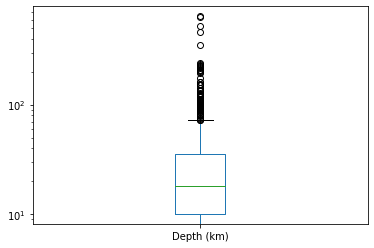

In [36]:
ax=earthq_df['Depth (km)'].plot.box()
ax.figsize=(20, 30)
plt.yscale('log')

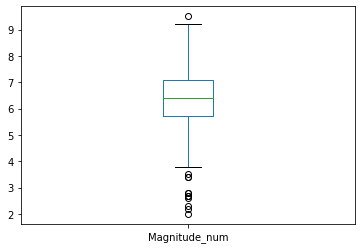

In [37]:
ax=earthq_df['Magnitude_num'].plot.box()
ax.figsize=(20, 30)

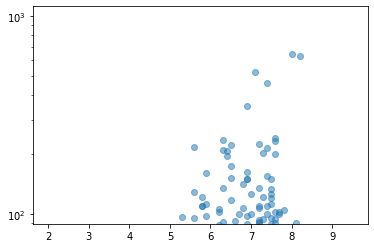

In [38]:
plt.scatter(earthq_df['Magnitude_num'],earthq_df['Depth (km)'], alpha=0.5)
plt.yscale('log')


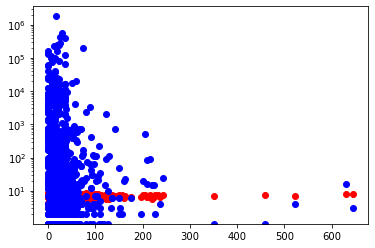

In [39]:
plt.scatter(earthq_df['Depth (km)'], earthq_df['Magnitude_num'],color='red')
plt.scatter(earthq_df['Depth (km)'], earthq_df['sum_deaths'] ,color= 'blue')
plt.yscale('log')

In [40]:
earthq_df['Log Depth (km)'] = np.log(earthq_df['Depth (km)'])

/Users/turik1/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/Users/turik1/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:153: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/turik1/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:163: RuntimeWarning: invalid value encountered in add
  y += start
/Users/turik1/opt/anaconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


Text(0.5, 1.0, 'Scatter Plot with Linear fit')

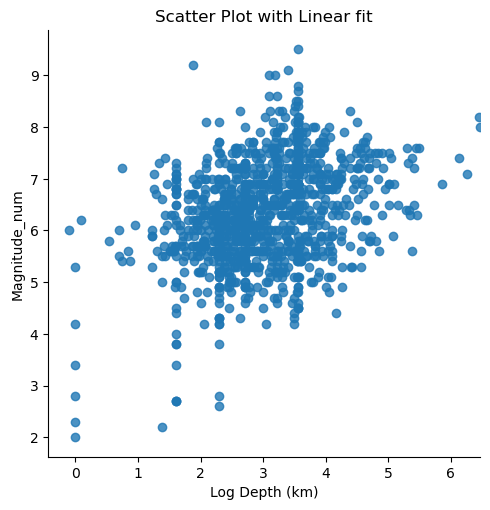

In [41]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='Log Depth (km)', y='Magnitude_num', data=earthq_df)
plt.title("Scatter Plot with Linear fit")

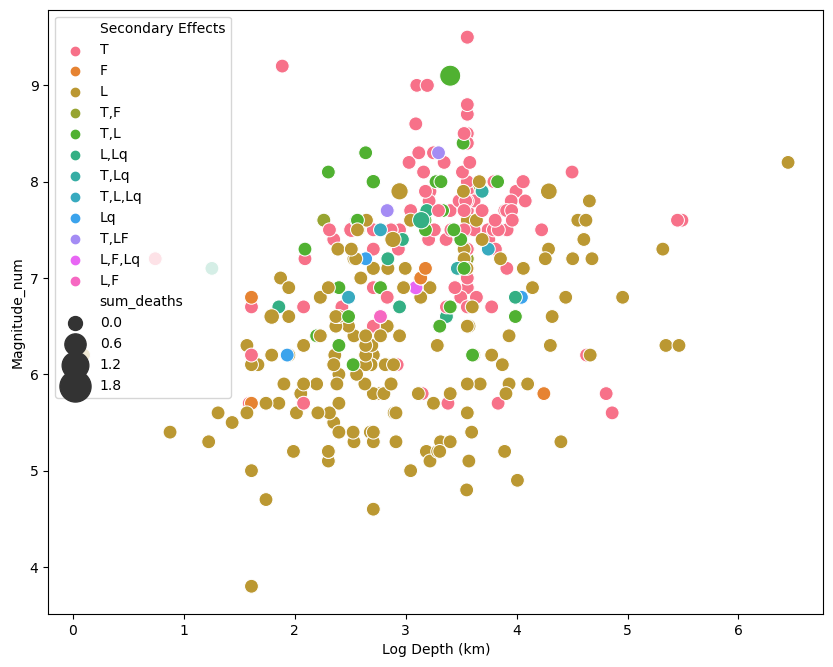

In [42]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.scatterplot(x='Log Depth (km)', y='Magnitude_num', hue='Secondary Effects', size='sum_deaths', sizes=(100, 500), data=earthq_df)




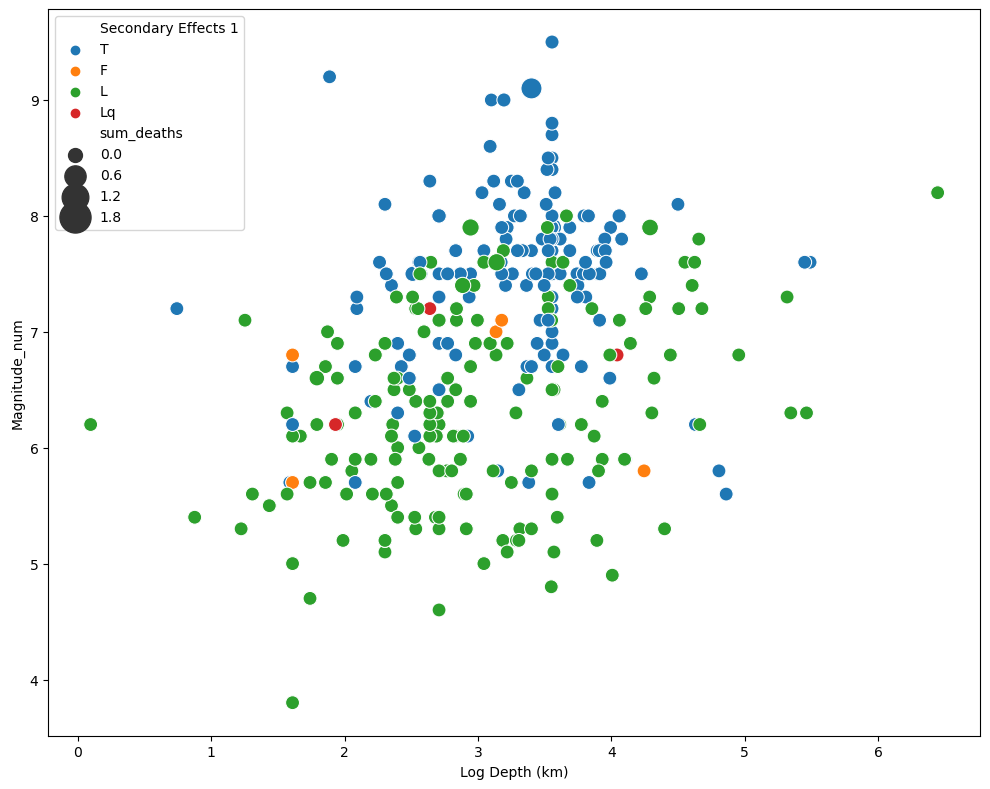

In [43]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.scatterplot(x='Log Depth (km)', y='Magnitude_num', hue='Secondary Effects 1', sizes=(100, 500), size='sum_deaths' , data=earthq_df)

plt.tight_layout()


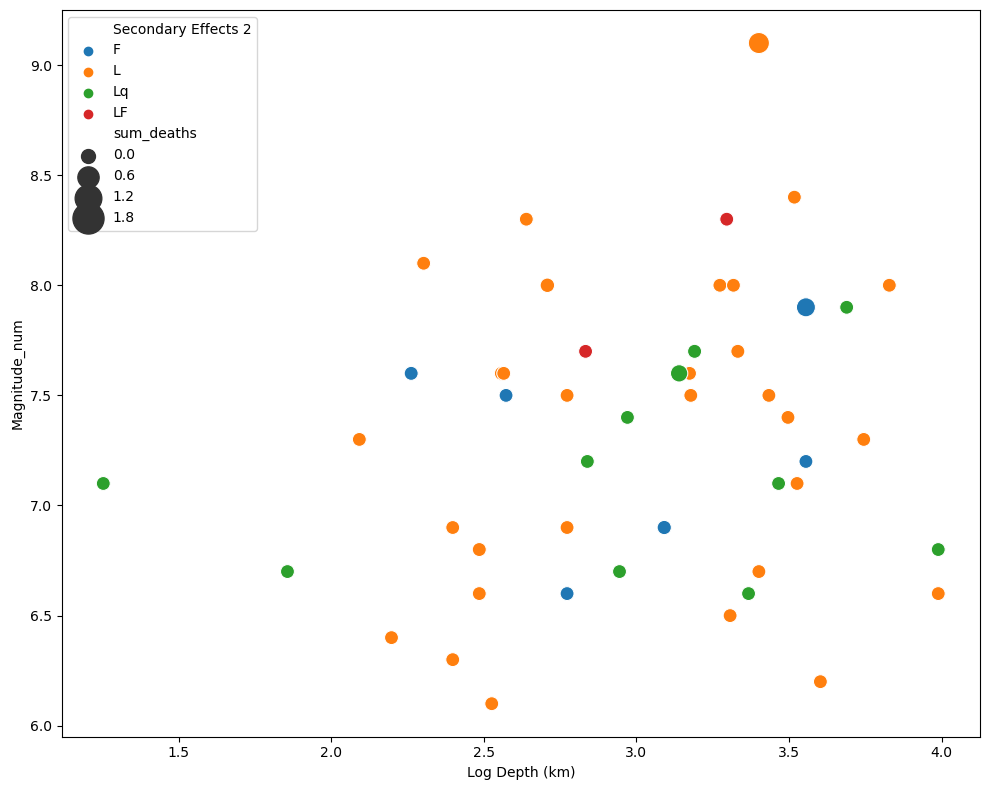

In [44]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.scatterplot(x='Log Depth (km)', y='Magnitude_num', hue='Secondary Effects 2', size='sum_deaths', sizes=(100, 500), data=earthq_df)

# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.01, 0.54),  borderaxespad=0.)

plt.tight_layout()



In [45]:
earthq_df['sum_deaths'].agg(['min','mean', 'max'])

min     0.000000e+00
mean    5.094265e+03
max     1.795274e+06
Name: sum_deaths, dtype: float64

#Part 2:

Use the requests library and the USGS's API (https://earthquake.usgs.gov/fdsnws/event/1/) to retrieve information about all recorded earthquakes that occurred in Tennessee since 1900. Answer the following questions:

1. How many earthquakes are in the dataset? Which region of Tennessee seems to be the most prone to earthquakes? Which is the least prone?
2. Do the magnitudes of earthquakes seem to follow the distribution described by Nate Silver. That is, one higher magnitude is ten times less likely to occur?

In [92]:


url='https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=1900-01-01&minlatitude=34.452&maxlatitude=37.44&minlongitude=-91.033&maxlongitude=-79.915&eventtype=earthquake'

In [93]:
usgs_response=requests.get(url)


In [110]:
usgs_json=usgs_response.json()

In [108]:

usgs_json['features']


[{'type': 'Feature',
  'properties': {'mag': 1.65,
   'place': '5 km SSW of Tiptonville, Tennessee',
   'time': 1603426158260,
   'updated': 1603471929410,
   'tz': None,
   'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/nm60312902',
   'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=nm60312902&format=geojson',
   'felt': None,
   'cdi': None,
   'mmi': None,
   'alert': None,
   'status': 'reviewed',
   'tsunami': 0,
   'sig': 42,
   'net': 'nm',
   'code': '60312902',
   'ids': ',nm60312902,',
   'sources': ',nm,',
   'types': ',origin,phase-data,',
   'nst': 24,
   'dmin': 0.01857,
   'rms': 0.03,
   'gap': 47,
   'magType': 'md',
   'type': 'earthquake',
   'title': 'M 1.7 - 5 km SSW of Tiptonville, Tennessee'},
  'geometry': {'type': 'Point',
   'coordinates': [-89.4846667, 36.3328333, 4.93]},
  'id': 'nm60312902'},
 {'type': 'Feature',
  'properties': {'mag': 2.14,
   'place': '2 km NNE of Cooter, Missouri',
   'time': 1603316985720,
   'updated': 1

In [117]:
result = pd.json_normalize(usgs_json, 'features')

In [119]:
result.head(20)

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,nm60312902,1.65,"5 km SSW of Tiptonville, Tennessee",1603426158260,1603471929410,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",24.0,0.018570,0.03,47.0,md,earthquake,"M 1.7 - 5 km SSW of Tiptonville, Tennessee",Point,"[-89.4846667, 36.3328333, 4.93]"
1,Feature,nm60312762,2.14,"2 km NNE of Cooter, Missouri",1603316985720,1603370993160,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",46.0,0.064300,0.10,40.0,md,earthquake,"M 2.1 - 2 km NNE of Cooter, Missouri",Point,"[-89.8023333, 36.0705, 6.84]"
2,Feature,nm60312752,1.69,"3 km E of Marston, Missouri",1603312122930,1603377956660,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",19.0,0.025960,0.03,50.0,md,earthquake,"M 1.7 - 3 km E of Marston, Missouri",Point,"[-89.5691667, 36.525, 6.85]"
3,Feature,se60312717,2.25,"4 km W of Evarts, Kentucky",1603294714380,1603306791529,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.0,...,",dyfi,origin,phase-data,",16.0,0.375000,0.32,98.0,md,earthquake,"M 2.3 - 4 km W of Evarts, Kentucky",Point,"[-83.2428333, 36.8671667, 9.37]"
4,Feature,se60312707,-0.67,"2 km SSE of Sparta, North Carolina",1603273484720,1603283517890,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",4.0,0.015160,0.01,183.0,md,earthquake,"M -0.7 - 2 km SSE of Sparta, North Carolina",Point,"[-81.1106667, 36.4865, 0.74]"
5,Feature,nm60312697,1.61,"4 km NW of Marston, Missouri",1603256151350,1603285497100,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",24.0,0.022450,0.04,44.0,md,earthquake,"M 1.6 - 4 km NW of Marston, Missouri",Point,"[-89.649, 36.5456667, 8.01]"
6,Feature,nm60312692,1.23,"7 km NW of Ridgely, Tennessee",1603249208800,1603286304430,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",17.0,0.026930,0.06,65.0,md,earthquake,"M 1.2 - 7 km NW of Ridgely, Tennessee",Point,"[-89.5361667, 36.3136667, 9.5]"
7,Feature,se60312687,0.19,"3 km SE of Sparta, North Carolina",1603248748740,1603289284520,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",6.0,0.007100,0.01,123.0,md,earthquake,"M 0.2 - 3 km SE of Sparta, North Carolina",Point,"[-81.1001667, 36.4841667, 7.18]"
8,Feature,nm60312672,2.33,"3 km W of Ridgely, Tennessee",1603219821800,1603283375220,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",46.0,0.015200,0.11,33.0,md,earthquake,"M 2.3 - 3 km W of Ridgely, Tennessee",Point,"[-89.5233333, 36.2675, 8.84]"
9,Feature,nm60312667,1.48,"9 km SE of Marston, Missouri",1603169817790,1603212636840,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",26.0,0.072380,0.05,42.0,md,earthquake,"M 1.5 - 9 km SE of Marston, Missouri",Point,"[-89.5321667, 36.458, 8.67]"


In [122]:
result.tail(60)

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
10690,Feature,nm600008,1.60,"12km ESE of Ridgely, Tennessee",143156273200,1460636961300,-360.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",general-link,geoserve,nearby-cities,origin,te...",NaN,NaN,NaN,NaN,mlg,earthquake,"M 1.6 - 12km ESE of Ridgely, Tennessee",Point,"[-89.35, 36.23, 5]"
10691,Feature,nm600007,1.60,"9km NE of Gosnell, Arkansas",143109448600,1460636955220,-360.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",general-link,general-link,geoserve,nearby-cit...",NaN,NaN,NaN,NaN,mlg,earthquake,"M 1.6 - 9km NE of Gosnell, Arkansas",Point,"[-89.9, 36.02, 5]"
10692,Feature,nm600006,2.00,"4km WNW of East Prairie, Missouri",142595474600,1460636949120,-360.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",general-link,geoserve,nearby-cities,origin,te...",NaN,NaN,NaN,NaN,mlg,earthquake,"M 2.0 - 4km WNW of East Prairie, Missouri",Point,"[-89.43, 36.8, 5]"
10693,Feature,nm600005,1.40,"8km SW of Lilbourn, Missouri",142575336100,1460636943040,-360.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",general-link,geoserve,nearby-cities,origin,te...",NaN,NaN,NaN,NaN,mlg,earthquake,"M 1.4 - 8km SW of Lilbourn, Missouri",Point,"[-89.69, 36.54, 5]"
10694,Feature,nm600004,1.90,"10km NNW of Clinton, Kentucky",142462928400,1460636936960,-360.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",general-link,geoserve,nearby-cities,origin,te...",NaN,NaN,NaN,NaN,mlg,earthquake,"M 1.9 - 10km NNW of Clinton, Kentucky",Point,"[-89.06, 36.75, 5]"
10695,Feature,nm600003,2.50,"7km S of Bardwell, Kentucky",142449197700,1460636930880,-360.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",general-link,geoserve,nearby-cities,origin,te...",NaN,NaN,NaN,NaN,mlg,earthquake,"M 2.5 - 7km S of Bardwell, Kentucky",Point,"[-89.01, 36.8, 5]"
10696,Feature,nm600002,1.80,"2km SW of Ridgely, Tennessee",142178286300,1460636924810,-360.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",general-link,geoserve,nearby-cities,origin,te...",NaN,NaN,NaN,NaN,mlg,earthquake,"M 1.8 - 2km SW of Ridgely, Tennessee",Point,"[-89.51, 36.25, 5]"
10697,Feature,nm600001,1.60,"10km WNW of Troy, Tennessee",141730029500,1460636918730,-360.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",general-link,geoserve,nearby-cities,origin,te...",NaN,NaN,NaN,NaN,mlg,earthquake,"M 1.6 - 10km WNW of Troy, Tennessee",Point,"[-89.28, 36.36, 5]"
10698,Feature,usp00006jz,3.60,West Virginia,139181317200,1415316084462,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,",NaN,NaN,NaN,NaN,lg,earthquake,M 3.6 - West Virginia,Point,"[-80.419, 37.382, 8]"
10699,Feature,usp00006b7,4.30,Missouri,137659938800,1598399061750,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",impact-text,origin,shakemap,",NaN,NaN,NaN,NaN,mb,earthquake,M 4.3 - Missouri,Point,"[-89.39, 36.71, 1]"


In [121]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10750 entries, 0 to 10749
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  10750 non-null  object 
 1   id                    10750 non-null  object 
 2   properties.mag        10743 non-null  float64
 3   properties.place      10750 non-null  object 
 4   properties.time       10750 non-null  int64  
 5   properties.updated    10750 non-null  int64  
 6   properties.tz         10151 non-null  float64
 7   properties.url        10750 non-null  object 
 8   properties.detail     10750 non-null  object 
 9   properties.felt       854 non-null    float64
 10  properties.cdi        854 non-null    float64
 11  properties.mmi        65 non-null     float64
 12  properties.alert      22 non-null     object 
 13  properties.status     10750 non-null  object 
 14  properties.tsunami    10750 non-null  int64  
 15  properties.sig     

In [127]:
result['properties.title'].unique()


array(['M 1.7 - 5 km SSW of Tiptonville, Tennessee',
       'M 2.1 - 2 km NNE of Cooter, Missouri',
       'M 1.7 - 3 km E of Marston, Missouri', ..., 'M 4.5 - Missouri',
       'M 5.1 - Missouri', 'M 4.6 - Tennessee'], dtype=object)

In [125]:
result['id'].count()

10750